# Notebook for *From Fed Funds to Mortgages*
### by Eric Leonen

In this notebook, we analyze and visualize the relationships between the links in the monetary policy transmission mechanism. Namely, the links between:
- The Federal Funds rate and the short-term rate (3-month Treasury)
- The short-term rate and the long-term rate (10-year Treasury)
- The long-term rate and the FRM rate (30-year Mortgage)

**Note:** This analysis had been done on August 13, 2025, meaning all series data up to 2025 Q2 were available.

In [1]:
from src.data import get_data, clean_data, diff_data
import src.plotting as plotting
from src.modelling import fit_lm

plotting.set_theme()

alpha = 0.05

**Step 1: Getting the data**

We get and plot the four (Federal Funds, short-term, long-term, and FRM) raw series from 1981 to 2025.

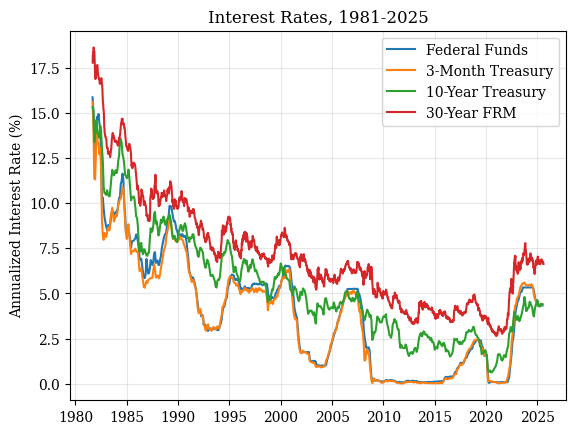

In [2]:
data_dict = get_data()

plotting.plot_data_dict(data_dict)

**Step 2: Cleaning and differencing the data**

We get year-over-year changes in average yearly rates to remove trends in all the series.

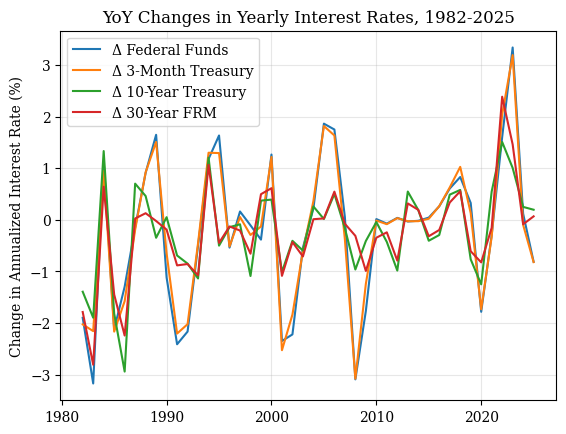

In [3]:
cleaned_data = clean_data(data_dict)
diffed_data = diff_data(cleaned_data)

plotting.plot_diffed_data(diffed_data)

**Step 3: Analyzing the relationship between changes in Federal Funds and changes in the short-term rate**

We perform an OLS regression to get the link between changes in these rates. We observe a significant positive relationship ($p\approx 0.000$) and a very strong linear relationship ($R^2=0.971$).

                            OLS Regression Results                            
Dep. Variable:     Δ 3-Month Treasury   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1424.
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           4.95e-34
Time:                        10:36:52   Log-Likelihood:                 2.5263
No. Observations:                  44   AIC:                            -1.053
Df Residuals:                      42   BIC:                             2.516
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0089      0.036     

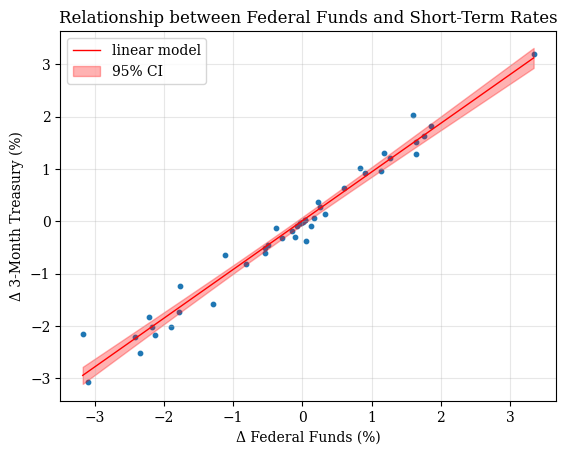

In [4]:
pred_3mo_from_ff, lm_3mo_from_ff = fit_lm(
    x=diffed_data["Δ Federal Funds"],
    y=diffed_data["Δ 3-Month Treasury"]
)

print(lm_3mo_from_ff.summary())

plotting.plot_lm(
    x=diffed_data["Δ Federal Funds"],
    y=diffed_data["Δ 3-Month Treasury"],
    predict_with_ci=pred_3mo_from_ff,
    alpha=alpha,
    title="Relationship between Federal Funds and Short-Term Rates"
)

**Step 4: Analyzing the relationship between changes in the short-term rate and changes in the long-term rate**

We perform an OLS regression to get the link between changes in these rates. We observe a significant positive relationship ($p\approx 0.000$) but a somewhat weak linear relationship ($R^2=0.491$).

                            OLS Regression Results                            
Dep. Variable:     Δ 10-Year Treasury   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     40.46
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           1.20e-07
Time:                        10:36:52   Log-Likelihood:                -42.342
No. Observations:                  44   AIC:                             88.68
Df Residuals:                      42   BIC:                             92.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1353      0

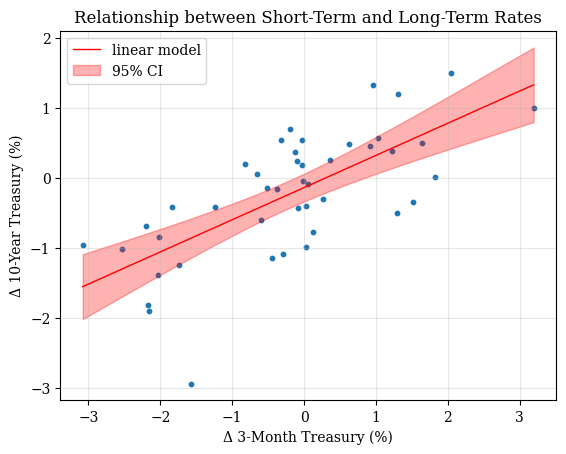

In [5]:
pred_10y_from_3mo, lm_10y_from_3mo = fit_lm(
    x=diffed_data["Δ 3-Month Treasury"],
    y=diffed_data["Δ 10-Year Treasury"]
)

print(lm_10y_from_3mo.summary())

plotting.plot_lm(
    x=diffed_data["Δ 3-Month Treasury"],
    y=diffed_data["Δ 10-Year Treasury"],
    predict_with_ci=pred_10y_from_3mo,
    alpha=alpha,
    title="Relationship between Short-Term and Long-Term Rates"
)

**Step 5: Analyzing the relationship between changes in the long-term rate and changes in the FRMs**

We perform an OLS regression to get the link between changes in these rates. We observe a significant positive relationship ($p\approx 0.000$) and a strong linear relationship ($R^2=0.833$).

                            OLS Regression Results                            
Dep. Variable:          Δ 30-Year FRM   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     210.1
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           6.01e-18
Time:                        10:36:52   Log-Likelihood:                -17.773
No. Observations:                  44   AIC:                             39.55
Df Residuals:                      42   BIC:                             43.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0436      0

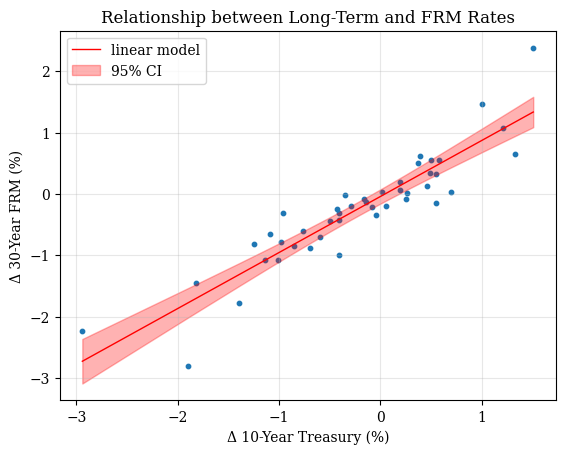

In [6]:
pred_30y_from_10y, lm_30y_from_10y = fit_lm(
    x=diffed_data["Δ 10-Year Treasury"],
    y=diffed_data["Δ 30-Year FRM"]
)

print(lm_30y_from_10y.summary())

plotting.plot_lm(
    x=diffed_data["Δ 10-Year Treasury"],
    y=diffed_data["Δ 30-Year FRM"],
    predict_with_ci=pred_30y_from_10y,
    alpha=alpha,
    title="Relationship between Long-Term and FRM Rates"
)